## Project 4 - Kaggle Competition Starter Code (West Nile Virus Detection)

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pdp

import seaborn as sns
import matplotlib.pyplot as plt
# display plots in the notebook
%matplotlib inline

In [2]:
#taking an initial look at the data set

In [122]:
train = pd.read_csv("../assets/train.csv")

In [123]:
# Every year from late-May to early-October, public health workers in Chicago setup mosquito traps scattered across 
# the city. Every week from Monday through Wednesday, these traps collect mosquitos, and the mosquitos are tested for 
# the presence of West Nile virus before the end of the week. The test results include the number of mosquitos, 
# the mosquitos species, and whether or not West Nile virus is present in the cohort. 

# These test results are organized in such a way that when the number of mosquitos exceed 50, they are split into 
# another record (another row in the dataset), such that the number of mosquitos are capped at 50. 

# The location of the traps are described by the block number and street name. For your convenience, we have mapped 
#these attributes into Longitude and Latitude in the dataset. Please note that these are derived locations. 
# For example, Block=79, and Street= "W FOSTER AVE" gives us an approximate address of "7900 W FOSTER AVE, Chicago, IL",
# which translates to (41.974089,-87.824812) on the map.

# Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap 
# to enhance surveillance efforts. Satellite traps are postfixed with letters. For example, T220A is a satellite trap 
# to T220. 

# Please note that not all the locations are tested at all times. Also, records exist only when a particular species 
# of mosquitos is found at a certain trap at a certain time. In the test set, we ask you for all combinations / 
# permutations of possible predictions and are only scoring the observed ones.

# train.csv, test.csv - the training and test set of the main dataset. The training set consists of data from 
# 2007, 2009, 2011, and 2013, while in the test set you are requested to predict the test results for 2008, 2010, 2012, 
# and 2014.
# Id: the id of the record
# Date: date that the WNV test is performed
# Address: approximate address of the location of trap. This is used to send to the GeoCoder. 
# Species: the species of mosquitos
# Block: block number of address
# Street: street name
# Trap: Id of the trap
# AddressNumberAndStreet: approximate address returned from GeoCoder
# Latitude, Longitude: Latitude and Longitude returned from GeoCoder
# AddressAccuracy: accuracy returned from GeoCoder
# NumMosquitos: number of mosquitoes caught in this trap
# WnvPresent: whether West Nile Virus was present in these mosquitos. 1 means WNV is present, and 0 means not present. 

train

#WnvPresent is clearly the target variable here. 
#will need to convert date column to date_time

#Could first two rows be duplicates? Their only difference is in species - different species from the same trap? Probably
#how often do mosquitos of different species in the same trap all carry wnv?
#does one species of mosquito carry wnv more than others?

#We'll need to match the spraying data with the data on which traps are checked, and then look at whether wnv reappears
#if it was previously present

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [124]:
train.describe(include="all")

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506,10506,10506,10506.000000,10506,10506,10506,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
unique,95,138,7,NaN,128,136,138,NaN,NaN,NaN,NaN,NaN
top,2007-08-01,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,NaN,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",NaN,NaN,NaN,NaN,NaN
freq,551,750,4752,NaN,750,750,750,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,35.687797,NaN,NaN,NaN,41.841139,-87.699908,7.819532,12.853512,0.052446
std,NaN,NaN,NaN,24.339468,NaN,NaN,NaN,0.112742,0.096514,1.452921,16.133816,0.222936
min,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,41.954690,-87.627796,9.000000,17.000000,0.000000


In [125]:
train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [110]:
#converting Date to datatime format
train["Date"] = pd.to_datetime(train["Date"], infer_datetime_format=True)

In [111]:
#Creating a separate column for "year" for ease of reading and later filtering
train["Year"] = train["Date"].dt.year


In [112]:
#Examining duplicate rows.
dup_rows = train[train.duplicated()] 
dup_rows.groupby("NumMosquitos").NumMosquitos.count()

#Most of the duplicates (707) had 50 mosquitos, which makes sense. If more than 50 mosquitos were detected from a given
#sample, another row would be added to the data set to account for any additional mosquitos. Presumably, most of the 
#duplicates with 50 mosquito counts had more than 100 mosquitos in them at the time they were collected. I think 
#we can safely drop all of the duplicates with fewer than 50 mosquitos, as traps are only collected once per week,
#so there should be no instances in which a trap would be checked twice in the same day and have the same small
#number of mosquitos inside.

#assembling rows to drop
mos_less_50 = train[train["NumMosquitos"] < 50]
drop_rows = mos_less_50[mos_less_50.duplicated]

#dropping 106 duplicate rows with fewer than 50 mos from train set
train = train[~train.isin(drop_rows)].dropna(how='all')


In [113]:
train.isnull().sum()
#no null values to worry about.

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
Year                      0
dtype: int64

In [114]:
#Creating "Parent Trap" column that will indicate all traps associated with a parent trap (e.g., T002A would be T002)
train["Parent_Trap"] = train["Trap"].str[:4]

#creating column to indicate if trap is satellite (1) or not (0) 
train["Is_Satellite"] = ""

train.ix[train["Trap"] == train["Parent_Trap"], "Is_Satellite"] = 0
train.ix[train["Is_Satellite"] == "", "Is_Satellite"] = 1

train.groupby("Is_Satellite").Is_Satellite.count()
#there are barely any records of satellite traps - only 14 in the entire dataset?
#After examining the data, there are only two satellite traps in the train set - T054C and T094B


Is_Satellite
0    10386
1       14
Name: Is_Satellite, dtype: int64

In [115]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Parent_Trap,Is_Satellite
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41.0,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9.0,1.0,0.0,2007.0,T002,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41.0,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9.0,1.0,0.0,2007.0,T002,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62.0,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9.0,1.0,0.0,2007.0,T007,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79.0,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8.0,1.0,0.0,2007.0,T015,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79.0,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8.0,4.0,0.0,2007.0,T015,0


In [119]:
#Finding which traps are associated with more than one pair of latitude and longitude:
dup_lat = train.groupby(["Trap", "Longitude"]).Latitude.count().unstack()

#filling in NaN values with 0
dup_lat.fillna(value=0.0, inplace=True) 

#counting number of non-zero cells in each row, and generating a separate columns of these counts:
#sourced from https://stackoverflow.com/questions/29229600/counting-number-of-zeros-per-row-by-pandas-dataframe
dup_lat["distinct"] = (dup_lat != 0).sum(axis=1)

#filtering to show only rows where more than one latitude is recorded for any trap
dup_lat = dup_lat[dup_lat["distinct"] > 1]

#removing all columns with all zeros to better see values of coordinate pairs:
#sourced from https://stackoverflow.com/questions/21164910/delete-column-in-pandas-based-on-condition
dup_lat = dup_lat.loc[:, (dup_lat != 0).any(axis=0)]

dup_lat
#two traps (T009 and T035) are associated with more than one pair of long/lat coordinates - perhaps they were replaced
#in different years?  Will need to check.

#I also confirmed that grouping by Trap and Latitude and counting Longitude produced the same results.

Longitude,-87.862995,-87.812827,-87.742302,-87.677737,distinct
Trap,,,,,
T009,80.0,31.0,0.0,0.0,2
T035,0.0,0.0,45.0,27.0,2


In [127]:
sorted(train.Date.unique())

['2007-05-29',
 '2007-06-05',
 '2007-06-26',
 '2007-06-29',
 '2007-07-02',
 '2007-07-11',
 '2007-07-18',
 '2007-07-19',
 '2007-07-25',
 '2007-07-27',
 '2007-08-01',
 '2007-08-02',
 '2007-08-03',
 '2007-08-07',
 '2007-08-08',
 '2007-08-09',
 '2007-08-15',
 '2007-08-16',
 '2007-08-17',
 '2007-08-21',
 '2007-08-22',
 '2007-08-24',
 '2007-08-28',
 '2007-09-04',
 '2007-09-05',
 '2007-09-06',
 '2007-09-12',
 '2007-09-18',
 '2007-09-19',
 '2007-09-24',
 '2007-09-25',
 '2007-10-04',
 '2007-10-09',
 '2009-05-28',
 '2009-06-02',
 '2009-06-03',
 '2009-06-05',
 '2009-06-12',
 '2009-06-15',
 '2009-06-19',
 '2009-06-22',
 '2009-06-26',
 '2009-06-29',
 '2009-07-06',
 '2009-07-10',
 '2009-07-13',
 '2009-07-17',
 '2009-07-24',
 '2009-07-27',
 '2009-07-31',
 '2009-08-07',
 '2009-08-13',
 '2009-08-25',
 '2009-08-27',
 '2009-09-03',
 '2009-09-14',
 '2009-09-17',
 '2009-09-25',
 '2009-10-01',
 '2011-06-10',
 '2011-06-17',
 '2011-06-24',
 '2011-06-30',
 '2011-07-11',
 '2011-07-15',
 '2011-07-25',
 '2011-07-

In [121]:
#finding all rows where Date, Species, and Trap are duplicates, so that the number of mosquitos for each unique
#combination can be summed together.

#Setting "keep=False" to ensure *all* duplicates are included (normally, the first unique instance is not included)
dup_trap_spec = train[train[["Date", "Species", "Trap"]].duplicated(keep=False)] 

dup_trap_spec
#lots of duplicates here - even beyond those found and eliminated above - different numbers of the same species
#of mosquitos in the same trap in the same day - what gives? I checked the dates, and there are many occurances
#of sequential test days (e.g., testing  '2007-08-01', '2007-08-02', and'2007-08-03'). I still have a hard time
#believing that tests are being conducted on the same trap multiple times per day.  What to do? Add all mosquitos
#from all traps of the same species, trap, and date together (without deleting duplicate rows)? If so, ensure that 
#any row with WNV present translates to the combined also indicated WNV being present.

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Parent_Trap,Is_Satellite
280,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79.0,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8.0,1.0,0.0,2007.0,T015,0
281,2007-07-11,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79.0,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8.0,2.0,0.0,2007.0,T015,0
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22.0,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8.0,50.0,0.0,2007.0,T086,0
294,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22.0,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8.0,35.0,0.0,2007.0,T086,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22.0,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8.0,50.0,0.0,2007.0,T086,0
296,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22.0,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8.0,8.0,0.0,2007.0,T086,0
297,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX RESTUANS,22.0,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8.0,1.0,0.0,2007.0,T086,0
298,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX RESTUANS,22.0,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8.0,8.0,0.0,2007.0,T086,0
315,2007-07-11,"3600 North Pittsburgh Avenue, Chicago, IL 6063...",CULEX RESTUANS,36.0,N PITTSBURGH AVE,T011,"3600 N PITTSBURGH AVE, Chicago, IL",41.944869,-87.832763,8.0,1.0,0.0,2007.0,T011,0
316,2007-07-11,"3600 North Pittsburgh Avenue, Chicago, IL 6063...",CULEX RESTUANS,36.0,N PITTSBURGH AVE,T011,"3600 N PITTSBURGH AVE, Chicago, IL",41.944869,-87.832763,8.0,2.0,0.0,2007.0,T011,0


In [11]:
#separating out data of traps and dates for where WNV was present.
wnv_outbreaks = train[train["WnvPresent"] == 1].groupby("Date").WnvPresent.count()
#creating new dataframe from data, and generating a separate index column
wnv_outbreaks = pd.DataFrame(wnv_outbreaks)
wnv_outbreaks.reset_index(inplace=True)
wnv_outbreaks.head()

,Date,WnvPresent
0,2007-07-18,1
1,2007-07-25,5
2,2007-08-01,18
3,2007-08-02,3
4,2007-08-07,12


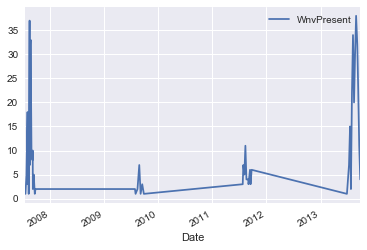

In [12]:
wnv_outbreaks.plot(x="Date", y="WnvPresent")

#definitely a lot fewer observations of wnv in 2009 and 2011 than in 2007 and 2013.  Take account of this when
#examining the y-axes of the following yearly plots

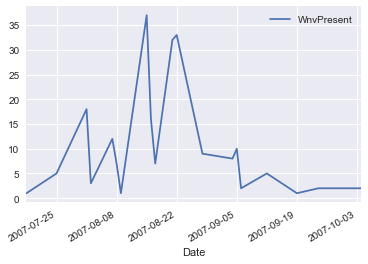

In [13]:
#plotting number of traps containing WNV in 2007
wnv_outbreaks[(wnv_outbreaks.Date > "2006-12-31") & (wnv_outbreaks.Date < "2008-01-01")].plot(x="Date", y="WnvPresent")

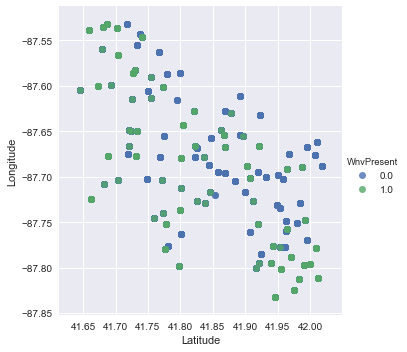

In [14]:
#scatter plot for WNV in 2007 
train_2007 = train[(train.Date > "2006-12-31") & (train.Date < "2008-01-01")]
sns.lmplot(x="Latitude", y="Longitude", data = train_2007, hue="WnvPresent", fit_reg=False)

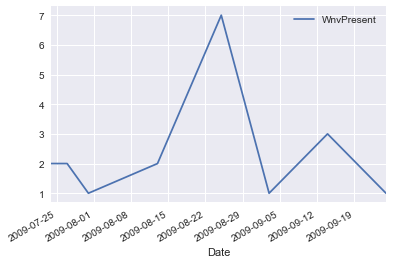

In [15]:
#plotting number of traps containing WNV in 2009
wnv_outbreaks[(wnv_outbreaks.Date > "2008-12-31") & (wnv_outbreaks.Date < "2010-01-01")].plot(x="Date", y="WnvPresent")

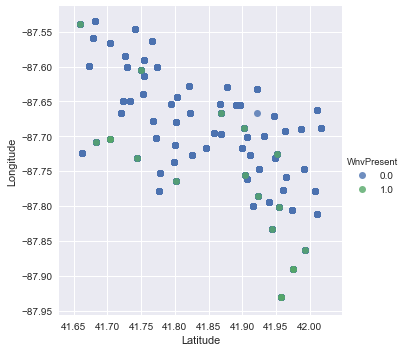

In [16]:
#scatter plot for WNV in 2009 
train_2009 = train[(train.Date > "2008-12-31") & (train.Date < "2010-01-01")]
sns.lmplot(x="Latitude", y="Longitude", data = train_2009, hue="WnvPresent", fit_reg=False)

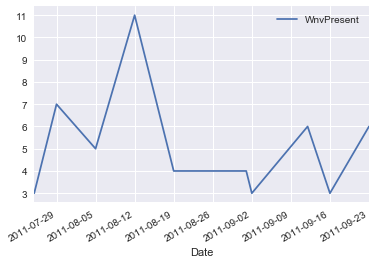

In [17]:
#plotting number of traps containing WNV in 2011
wnv_outbreaks[(wnv_outbreaks.Date > "2010-12-31") & (wnv_outbreaks.Date < "2012-01-01")].plot(x="Date", y="WnvPresent")

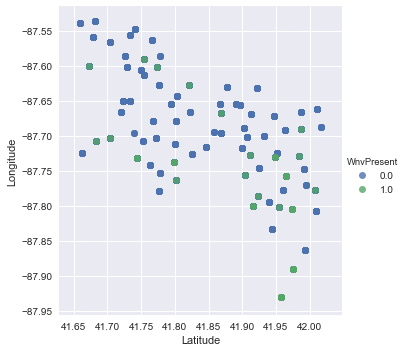

In [18]:
#scatter plot for WNV in 2011 
train_2011 = train[(train.Date > "2010-12-31") & (train.Date < "2012-01-01")]
sns.lmplot(x="Latitude", y="Longitude", data = train_2011, hue="WnvPresent", fit_reg=False)

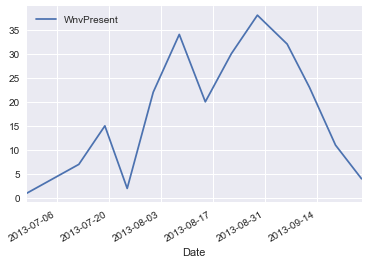

In [19]:
#plotting number of traps containing WNV in 2013
wnv_outbreaks[(wnv_outbreaks.Date > "2012-12-31") & (wnv_outbreaks.Date < "2014-01-01")].plot(x="Date", y="WnvPresent")

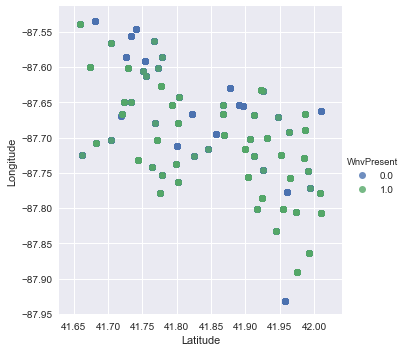

In [20]:
#scatter plot for WNV in 2013 
train_2013 = train[(train.Date > "2012-12-31") & (train.Date < "2014-01-01")]
sns.lmplot(x="Latitude", y="Longitude", data = train_2013, hue="WnvPresent", fit_reg=False)

In [43]:
#How many mosquitos were in traps when WNV was found compared to when not found?
print("Mean number of mosquitos present when WNV is absent vs. present: ")
print(train.groupby("WnvPresent").NumMosquitos.mean())
print
#on average, traps with wnv present had over twice as many mosquitos as those without (26.36 vs. 12.16)
#the ranges of mosquitos in both types of traps (not shown here) is from 1-50 for both conditions, so range isn't helpful

#How many mosquitos were in traps when WNV was found compared to when not found?
print("Median number of mosquitos present when WNV is absent vs. present: ")
print(train.groupby("WnvPresent").NumMosquitos.median())
print
#on average, traps with wnv present had over twice as many mosquitos as those without (26.36 vs. 12.16)
#the ranges of mosquitos in both types of traps (not shown here) is from 1-50 for both conditions, so range isn't helpful

#looking at std of number of mosquitos when WNV is absent vs. present
print("Standard deviation of mosquitos present when WNV is absent vs. present: ")
print(train.groupby("WnvPresent").NumMosquitos.std())
print

#Using mean and std, we can know how many mosquitos were in 68% of traps with and without WNV 
print("Range of Mosquitos in traps without WNV (one STD around Mean): ") 
print(train[train["WnvPresent"]==0].NumMosquitos.mean() - train[train["WnvPresent"]==0].NumMosquitos.std(),
      train[train["WnvPresent"]==0].NumMosquitos.mean() + train[train["WnvPresent"]==0].NumMosquitos.std())
print

print("Range of Mosquitos in traps with WNV (one STD around Mean): ") 
print(train[train["WnvPresent"]==1].NumMosquitos.mean() - train[train["WnvPresent"]==1].NumMosquitos.std(),
      train[train["WnvPresent"]==1].NumMosquitos.mean() + train[train["WnvPresent"]==1].NumMosquitos.std())

#trying to work with the number of mosquitos in a trap at any given time is really complicated by how the traps are
#broken into separate rows when more than 50 mosquitos are present.  Do we want to compile those observations where
#traps were clearly broken into separate rows?  Like, add all of the mosquitos of a given type together per trap /
#per day to get a sense of how many total mosquitos of each species were in a trap in a given day? This could 
#probably give us a better sense of how many mosquitos were actually there, and potentially help to distinguish the
#typical number of mosquitos appearing in traps when WNV was present vs. not. 

#This may only have limited use, though, because we aren't provided information on the number of mosquitos per trap 
#in the test set.  Still, we might be able to look at how total mosquito numbers correlate with weather or spray
#patterns, and maybe use this in predicting whether WNV will be present based on weather and spray data associated 
#with the test set?

Mean number of mosquitos present when WNV is absent vs. present: 
WnvPresent
0.0    12.164772
1.0    26.360000
Name: NumMosquitos, dtype: float64

Median number of mosquitos present when WNV is absent vs. present: 
WnvPresent
0.0     4.0
1.0    24.0
Name: NumMosquitos, dtype: float64

Standard deviation of mosquitos present when WNV is absent vs. present: 
WnvPresent
0.0    15.774407
1.0    17.104028
Name: NumMosquitos, dtype: float64

Range of Mosquitos in traps without WNV (one STD around Mean): 
(-3.6096355328121064, 27.939178680020227)

Range of Mosquitos in traps with WNV (one STD around Mean): 
(9.255972416917654, 43.46402758308234)


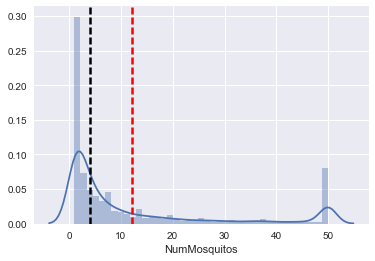

In [41]:
#plotting number of mosquitos in traps without WNV (black is median, red is mean)
no_wnv = sns.distplot(train[train["WnvPresent"]==0].NumMosquitos)
no_wnv.axvline(train[train["WnvPresent"]==0].NumMosquitos.median(), lw=2.5, ls='dashed', color='black')
no_wnv.axvline(train[train["WnvPresent"]==0].NumMosquitos.mean(), lw=2.5, ls='dashed', color='red')

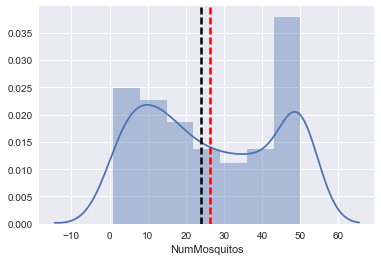

In [42]:
#plotting number of mosquitos in traps with WNV (black is median, red is mean)
wnv = sns.distplot(train[train["WnvPresent"]==1].NumMosquitos)
wnv.axvline(train[train["WnvPresent"]==1].NumMosquitos.median(), lw=2.5, ls='dashed', color='black')
wnv.axvline(train[train["WnvPresent"]==1].NumMosquitos.mean(), lw=2.5, ls='dashed', color='red')

In [62]:
#Which species of mosquitos most typically carried WNV?
#counting number of traps in which WNV is present vs. absent by species
species_groups = train.groupby(["Species", "WnvPresent"]).WnvPresent.count().unstack()

#filling NaN values for species where WNV was never present
species_groups[1].fillna(value=0.0, inplace=True) 

#calculating total traps counted for each species
species_groups["Total"] = species_groups[0] + species_groups[1]

#calculating proportion of all traps for each species in which WNV was present
species_groups["Proportion_WNV_Present"] = (species_groups[1]/species_groups["Total"])

species_groups

#only CULEX PIPIENS, CULEX PIPIENS/RESTUANS, CULEX RESTUANS were found to carry WNV. 
# 9% of traps containing CULEX PIPIENS contained WNV; 
# 5% of traps containing CULEX PIPIENS/RESTUANS contained WNV; 
# ~2% of traps containing CULEX RESTUANS contained WNV; 
#These figures might change if we consolidate observations of 50+ mosquitos intos single traps

WnvPresent,0.0,1.0,Total,Proportion_WNV_Present
Species,,,,
CULEX ERRATICUS,1.0,0.0,1.0,0.000000
CULEX PIPIENS,2424.0,240.0,2664.0,0.090090
CULEX PIPIENS/RESTUANS,4451.0,261.0,4712.0,0.055390
CULEX RESTUANS,2662.0,49.0,2711.0,0.018075
CULEX SALINARIUS,85.0,0.0,85.0,0.000000
CULEX TARSALIS,6.0,0.0,6.0,0.000000
CULEX TERRITANS,221.0,0.0,221.0,0.000000


In [ ]:
#How many measurements were observed for each trap in a given year?  
#What is the proportion of a trap being checked to containing WNV?

#Which traps never had WNV?  
#Which traps ever had WNV? 
#Which traps had WNV more than once per year? 
#Which traps had WNV more than one year?
#How consistent were satellite traps with their parent traps in detecting WNV?

In [17]:
pdp.ProfileReport(train)

Number of variables,12
Number of observations,10506
Total Missing (%),0.0%
Total size in memory,985.0 KiB
Average record size in memory,96.0 B
Numeric,6
Categorical,6
Date,0
Text (Unique),0
Rejected,0
Distinct count,138


In [44]:
test = pd.read_csv("../assets/test.csv")

In [45]:
test
#note - test data does not include NumMosquitos or WnvPresent

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
5,6,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TARSALIS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
6,7,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",UNSPECIFIED CULEX,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
7,8,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX ERRATICUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
8,9,2008-06-11,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX PIPIENS/RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9
9,10,2008-06-11,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9


In [46]:
#Examining duplicate rows.
test_dup_rows = test[test.duplicated()] 
test_dup_rows.shape

#No duplicate rows in the test data, which is good.

(0, 11)

In [8]:
weather = pd.read_csv("../assets/weather.csv") 

In [9]:
#weather.csv - weather data from 2007 to 2014. Column descriptions in noaa_weather_qclcd_documentation.pdf. 

weather
#lots of variables here. Might be able to do a merge of data on the train/test data depending on relative proximaty?
#What do the M's stand for - missing data?

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


In [10]:
weather.columns
#probably don't need sunrise, sunset, or snowfall - can see about dropping these. Any other columns we don't need?
#could depend on variability of data within

Index([u'Station', u'Date', u'Tmax', u'Tmin', u'Tavg', u'Depart', u'DewPoint',
       u'WetBulb', u'Heat', u'Cool', u'Sunrise', u'Sunset', u'CodeSum',
       u'Depth', u'Water1', u'SnowFall', u'PrecipTotal', u'StnPressure',
       u'SeaLevel', u'ResultSpeed', u'ResultDir', u'AvgSpeed'],
      dtype='object')

In [11]:
spray = pd.read_csv("../assets/spray.csv") 

In [12]:
# The City of Chicago also does spraying to kill mosquitos. You are given the GIS data for their spray efforts in 2011
# and 2013. Spraying can reduce the number of mosquitos in the area, and therefore might eliminate the appearance of 
# West Nile virus. 

# spray.csv - GIS data of spraying efforts in 2011 and 2013
# Date, Time: the date and time of the spray
# Latitude, Longitude: the Latitude and Longitude of the spray

spray
#can match date and coordinates to stations in train/test sets?
#which locations were never sprayed, or sprayed least? 
#were locations sprayed most often those with wnv most often recorded?
#what about those were spraying was rarely if ever done?

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
5,2011-08-29,6:57:48 PM,42.390395,-88.088315
6,2011-08-29,6:57:58 PM,42.390673,-88.088002
7,2011-08-29,6:58:08 PM,42.391027,-88.088002
8,2011-08-29,6:58:18 PM,42.391403,-88.088003
9,2011-08-29,6:58:28 PM,42.391718,-88.087995


In [13]:
sampsub = pd.read_csv("../assets/sampleSubmission.csv") 

In [14]:
sampsub
#sample submission is simply a list of the trap IDs along with the prediction of whether each has WnvPresent
#Note from Kaggle page, For each record in the test set, you should predict a real-valued probability that WNV 
#is present. That is, they shouldn't just be 0 or 1, but should be probabilities (e.g., 0.2, 0.9)

# see page here: https://www.kaggle.com/c/predict-west-nile-virus#evaluation

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [ ]:
#general thoughts:
#if using a SVM classifier-use rbf? wnv would conceivably be clustered in relative circles or radii around infect traps.
#there's likely a pretty good relationship between sattelite traps and their corresponding original traps.
    #how to code for this relationship when data cleaning?
#investigate creating a Trello board to organize project work activities?
#Using np.correlate, explore correlations in the data. Document your findings
#the solution code for a previous lab did have a model AUC plot in it. We could look back to that if we want to try
#modeling out own results.

# Define your deliverable- what is the end result?
# Break that deliverable up into its components, go further until you have actionable items. 
# Document these however you wish
# Begin deciding priorities for each task. Order these priorities however you would like.
